## Lunar Lander with PPO

TODO Describe this notebook

In [1]:
# TODO Document the meaning of this magic
%reload_ext autoreload
%autoreload 2

In [2]:
# Forcefully remove the old 'gym' package to avoid conflicts in Colab
%pip uninstall -y gym
%pip install -qr https://raw.githubusercontent.com/anton-dergunov/hugging-face-deep-rl/main/requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# TODO Clean up this list of imports
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecMonitor
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.results_plotter import plot_results
from stable_baselines3.common import results_plotter
from huggingface_hub import HfApi, create_repo, notebook_login, hf_hub_download
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt
from pathlib import Path
import hashlib
import imageio
import os
import json
import tempfile
import warnings

In [4]:
import sys
import os

src_path = os.path.abspath("./src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

In [5]:
from utils import *

In [6]:
setup_ignore_warnings()

In [7]:
ENV_ID = "LunarLander-v3"
MODEL_NAME = "LunarLander_PPO"
REPO_ID = f"AntonDergunov/{MODEL_NAME}"

In [8]:
MODEL_PATH = f"models/{MODEL_NAME}.zip"
VIDEO_PATH = f"videos/{MODEL_NAME}.mp4"
LOGS_PATH = f"logs/{MODEL_NAME}"

os.makedirs(os.path.dirname(MODEL_PATH), exist_ok=True)
os.makedirs(os.path.dirname(VIDEO_PATH), exist_ok=True)
os.makedirs(LOGS_PATH, exist_ok=True)

### Environment

TODO Describe the environment
https://gymnasium.farama.org/environments/box2d/lunar_lander/

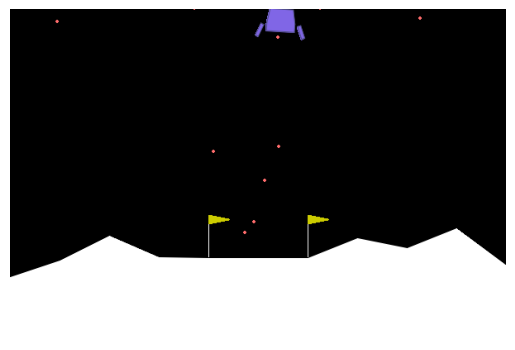

In [9]:
show_environment(ENV_ID)

In [19]:
vec_env = make_vec_env(ENV_ID, n_envs=4, monitor_dir=LOGS_PATH)

In [20]:
describe_environment(vec_env)

Observation Space:
  Box(shape=(8,), dtype=float32, low=-10.0, high=10.0)
  Example observation: [ 0.41224033  1.3086056   8.883539   -9.431838   -2.6359231  -4.824621
  0.32064357  0.11574553]

Action Space:
  Discrete(n=4)
  Example action: 1

Max episode steps: 1000
